In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)
# path = '/content/drive/MyDrive/datasets/'
path = 'datasets/'
cumtd_data = '00CUMTD_Route_Ridership_By_Day_September_2022_2023.csv'
data_file = path + cumtd_data # get the directory of the file

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# https://www.youtube.com/watch?v=mgX0Iz4q0bE
# https://github.com/nicknochnack/Forecasting-Weather-with-Neural-Prophet/blob/main/Neural%20Prophet.ipynb

In [5]:
import os # if you want to be inside this directory

In [6]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B267-1C09

 Directory of c:\Users\louis\Desktop\03MyProjects\ITE_UIUC_EOH_2024_Mobility_for_Our_Future\Data_Science

04/12/2024  01:41 PM    <DIR>          .
04/12/2024  01:23 PM    <DIR>          ..
04/12/2024  01:12 PM           333,007 Brandon_Teal.ipynb
04/12/2024  01:33 PM    <DIR>          datasets
04/12/2024  01:38 PM    <DIR>          figures
04/12/2024  01:29 PM        31,643,672 ITE_Data_Science_EOH_2024_Presentation.pptx
04/12/2024  01:02 PM           242,381 ITE_UIUC_ML.ipynb
04/12/2024  01:40 PM         1,011,689 Louis_Yellow_Route.ipynb
04/12/2024  01:38 PM         1,172,612 Mitchell_Orange.ipynb
               5 File(s)     34,403,361 bytes
               4 Dir(s)  452,250,406,912 bytes free


In [7]:
dataframe = pd.read_csv(data_file) # read in the csv file
dataframe

,Date,Line,In (Sum),Out (Sum),Load (Avg.),Load max,#APC-Trips
0,2022-08-31T19:00:00-05:00,1 YELLOW ALT,34,34,8.1,33,2
1,2022-08-31T19:00:00-05:00,10W GOLD ALT,47,47,14.6,43,1
2,2022-08-31T19:00:00-05:00,1N YELLOW ALT,140,140,24.0,87,2
3,2022-08-31T19:00:00-05:00,1N YELLOW ALT PM,41,41,15.5,41,1
4,2022-08-31T19:00:00-05:00,1S YELLOW ALT,120,120,8.2,56,3
...,...,...,...,...,...,...,...
15774,2023-09-29T19:00:00-05:00,TEAL LATE NIGHT SATURDAY,163,163,3.2,21,16
15775,2023-09-29T19:00:00-05:00,TEAL SATURDAY,"1,980","1,980",9.0,53,74
15776,2023-09-29T19:00:00-05:00,YELLOW EVENING SATURDAY,868,868,6.0,79,26
15777,2023-09-29T19:00:00-05:00,YELLOW LATE NIGHT SATURDAY,79,79,0.7,13,21


In [8]:
colums_to_traverse = dataframe.keys()[2:] # these are the columns we will be traversing for out data analysis
colums_to_traverse

Index(['In (Sum)', 'Out (Sum)', 'Load (Avg.)', 'Load max', '#APC-Trips'], dtype='object')

In [9]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe

,Date,Line,In (Sum),Out (Sum),Load (Avg.),Load max,#APC-Trips
0,2022-08-31 19:00:00-05:00,1 YELLOW ALT,34,34,8.1,33,2
1,2022-08-31 19:00:00-05:00,10W GOLD ALT,47,47,14.6,43,1
2,2022-08-31 19:00:00-05:00,1N YELLOW ALT,140,140,24.0,87,2
3,2022-08-31 19:00:00-05:00,1N YELLOW ALT PM,41,41,15.5,41,1
4,2022-08-31 19:00:00-05:00,1S YELLOW ALT,120,120,8.2,56,3
...,...,...,...,...,...,...,...
15774,2023-09-29 19:00:00-05:00,TEAL LATE NIGHT SATURDAY,163,163,3.2,21,16
15775,2023-09-29 19:00:00-05:00,TEAL SATURDAY,"1,980","1,980",9.0,53,74
15776,2023-09-29 19:00:00-05:00,YELLOW EVENING SATURDAY,868,868,6.0,79,26
15777,2023-09-29 19:00:00-05:00,YELLOW LATE NIGHT SATURDAY,79,79,0.7,13,21


In [10]:
bus_lines = dataframe['Line'].unique() # we want to see how many unique bus lines there are
print(f'CUMTD bus lines: {bus_lines}')

CUMTD bus lines: ['1 YELLOW ALT' '10W GOLD ALT' '1N YELLOW ALT' '1N YELLOW ALT PM'
 '1S YELLOW ALT' '3S LAVENDER ALT' '5E GREEN EXPRESS 1 ALT'
 '5E GREEN EXPRESS ALT' '5W GREEN ALT 2' '5W GREEN EXPRESS 2'
 '7E GREY ALT' '7W GREY ALT' 'BLUE' 'BRONZE' 'BRONZE ALT' 'BROWN'
 'BROWN ALT' 'BROWN ALT PM' 'BROWN ALT1' 'GOLD' 'GOLD ALT' 'GOLDHOPPER'
 'GREEN' 'GREEN ALT' 'GREEN EVENING' 'GREEN EXPRESS' 'GREEN EXPRESS ALT'
 'GREEN LATE NIGHT' 'GREENHOPPER' 'GREENHOPPER EVENING' 'GREY' 'GREY ALT'
 'GREY EVENING' 'ILLINI' 'ILLINI EVENING' 'LAVENDER' 'LAVENDER ALT'
 'LIME EVENING' 'LINK' 'NAVY' 'ORANGE' 'ORANGE ALT' 'ORANGEHOPPER' 'PINK'
 'PINK ALT' 'RAVEN' 'RED' 'RUBY' 'RUBY EVENING' 'SILVER' 'SILVER EVENING'
 'SILVER LATE NIGHT' 'TEAL' 'TEAL EVENING' 'TEAL LATE NIGHT' 'YELLOW'
 'YELLOW EVENING' 'YELLOW LATE NIGHT' 'YELLOWHOPPER'
 'GREEN EVENING SATURDAY' 'GREEN LATE NIGHT SATURDAY' 'GREEN SATURDAY'
 'GREENHOPPER EVENING SATURDAY' 'GREY EVENING SATURDAY' 'GREY SATURDAY'
 'ILLINI EVENING SATURDAY' '

In [11]:
teal_bus_lines = [line for line in bus_lines if "teal" in line.lower()]
teal_bus_lines

['TEAL',
 'TEAL EVENING',
 'TEAL LATE NIGHT',
 'TEAL EVENING SATURDAY',
 'TEAL LATE NIGHT SATURDAY',
 'TEAL SATURDAY',
 'TEAL LATE NIGHT SUNDAY',
 'TEAL SUNDAY',
 'TEST TEAL']

In [12]:
# Define the list of line names you're interested in
lines_of_interest = teal_bus_lines

# Filter the dataframe based on the list
filtered_dataframe = dataframe[dataframe['Line'].isin(lines_of_interest)]
filtered_dataframe

,Date,Line,In (Sum),Out (Sum),Load (Avg.),Load max,#APC-Trips
52,2022-08-31 19:00:00-05:00,TEAL,"3,408","3,408",9.7,72,113
53,2022-08-31 19:00:00-05:00,TEAL EVENING,639,639,7.0,43,30
54,2022-08-31 19:00:00-05:00,TEAL LATE NIGHT,62,62,1.3,14,16
111,2022-09-01 19:00:00-05:00,TEAL,"2,806","2,806",8.2,68,114
112,2022-09-01 19:00:00-05:00,TEAL EVENING,607,607,6.9,32,30
...,...,...,...,...,...,...,...
15751,2023-09-28 19:00:00-05:00,TEAL EVENING,837,837,8.3,46,33
15752,2023-09-28 19:00:00-05:00,TEAL LATE NIGHT,233,233,4.9,38,16
15773,2023-09-29 19:00:00-05:00,TEAL EVENING SATURDAY,768,768,7.3,40,31
15774,2023-09-29 19:00:00-05:00,TEAL LATE NIGHT SATURDAY,163,163,3.2,21,16


In [13]:
mask = filtered_dataframe['Line'] == 'TEAL'
teal = filtered_dataframe[mask]
teal

,Date,Line,In (Sum),Out (Sum),Load (Avg.),Load max,#APC-Trips
52,2022-08-31 19:00:00-05:00,TEAL,"3,408","3,408",9.7,72,113
111,2022-09-01 19:00:00-05:00,TEAL,"2,806","2,806",8.2,68,114
205,2022-09-05 19:00:00-05:00,TEAL,"3,098","3,098",8.8,65,118
264,2022-09-06 19:00:00-05:00,TEAL,"3,094","3,094",8.5,64,122
322,2022-09-07 19:00:00-05:00,TEAL,"3,049","3,049",8.4,69,118
...,...,...,...,...,...,...,...
15518,2023-09-24 19:00:00-05:00,TEAL,"3,507","3,507",9.7,66,117
15576,2023-09-25 19:00:00-05:00,TEAL,"3,516","3,516",9.5,71,117
15634,2023-09-26 19:00:00-05:00,TEAL,"3,491","3,491",9.3,65,119
15692,2023-09-27 19:00:00-05:00,TEAL,"3,473","3,473",9.8,68,117


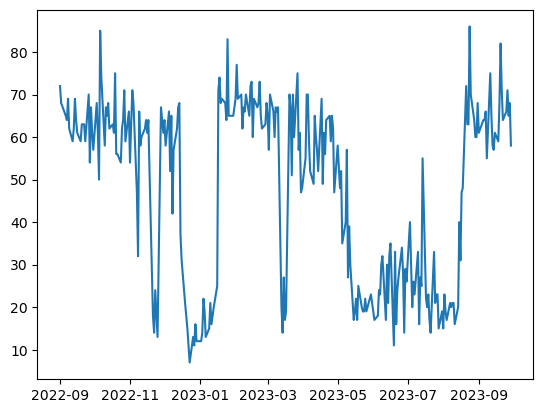

In [14]:
 plt.plot(teal['Date'],teal['Load max'])

In [15]:
teal = teal.set_index('Date')
teal = teal.asfreq('D')
teal.index

DatetimeIndex(['2022-08-31 19:00:00-05:00', '2022-09-01 19:00:00-05:00',
               '2022-09-02 19:00:00-05:00', '2022-09-03 19:00:00-05:00',
               '2022-09-04 19:00:00-05:00', '2022-09-05 19:00:00-05:00',
               '2022-09-06 19:00:00-05:00', '2022-09-07 19:00:00-05:00',
               '2022-09-08 19:00:00-05:00', '2022-09-09 19:00:00-05:00',
               ...
               '2023-09-19 19:00:00-05:00', '2023-09-20 19:00:00-05:00',
               '2023-09-21 19:00:00-05:00', '2023-09-22 19:00:00-05:00',
               '2023-09-23 19:00:00-05:00', '2023-09-24 19:00:00-05:00',
               '2023-09-25 19:00:00-05:00', '2023-09-26 19:00:00-05:00',
               '2023-09-27 19:00:00-05:00', '2023-09-28 19:00:00-05:00'],
              dtype='datetime64[ns, UTC-05:00]', name='Date', length=394, freq='D')

In [16]:
teal.isnull().sum()

Line           117
In (Sum)       117
Out (Sum)      117
Load (Avg.)    117
Load max       117
#APC-Trips     117
dtype: int64

In [17]:
y_var = 'Load (Avg.)'

In [18]:
y = teal[y_var]
y = y.asfreq('D')

In [19]:
print(y.isnull().sum())

117


In [20]:
y = y.fillna(y.mean())

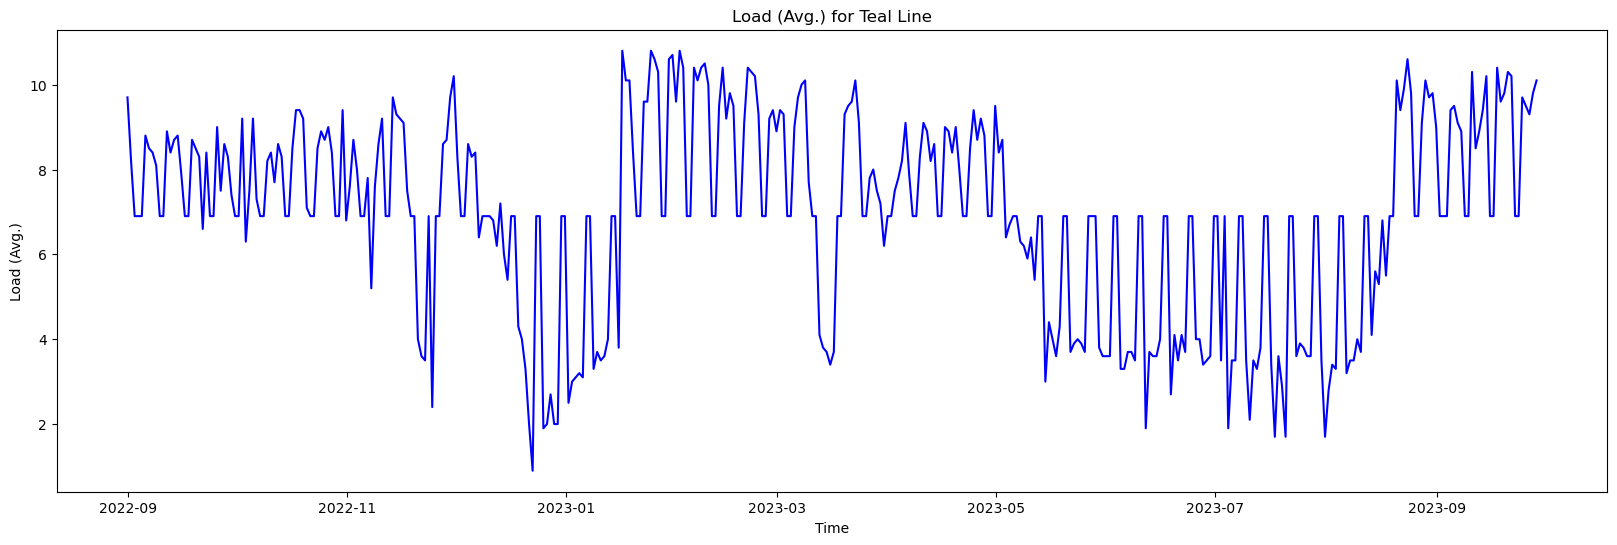

In [21]:
plt.figure(figsize=(20, 6))
plt.plot(y, label='Observed Data', color='blue')
plt.title('Load (Avg.) for Teal Line')
plt.xlabel('Time')
plt.ylabel('Load (Avg.)')
plt.savefig('figures/Brandon_Teal/observations/Brandon_Teal.png')
# plt.savefig('/content/drive/MyDrive/Data_Science/figures/Brandon_Teal.png')

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing

model = ExponentialSmoothing(y, seasonal='mul', seasonal_periods=160).fit()

c:\Users\louis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


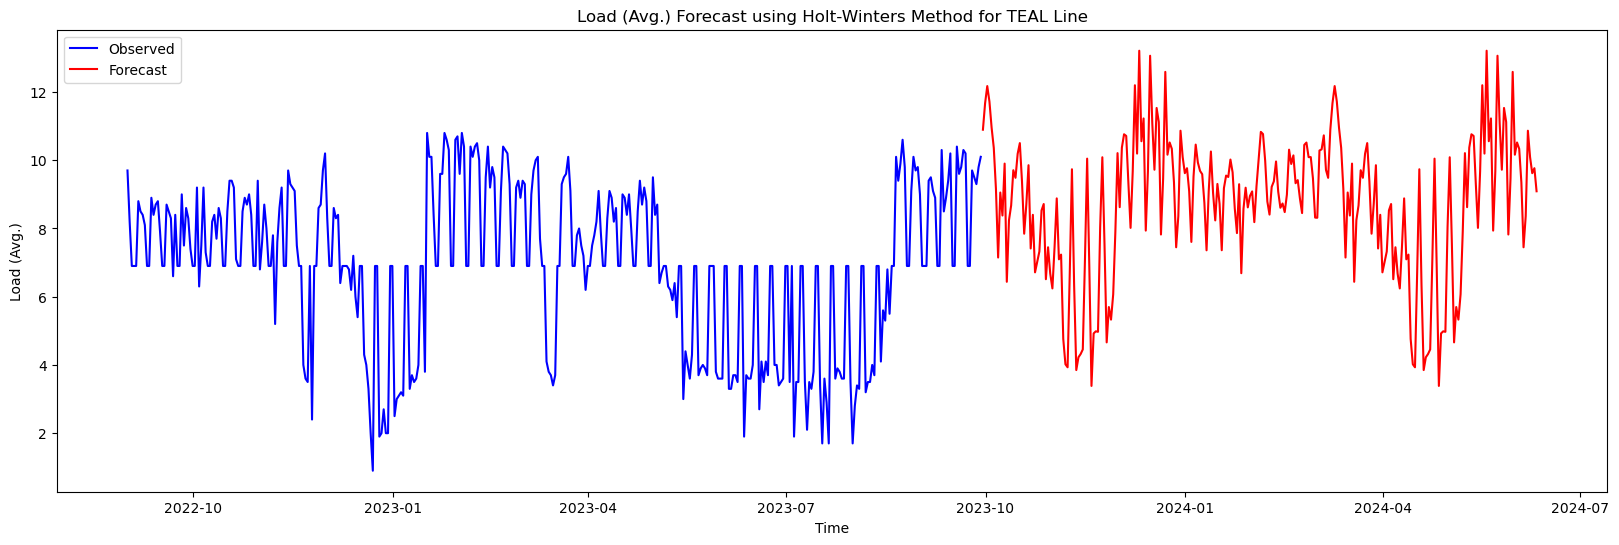

In [23]:
y_forecasted = model.forecast(steps=256)
plt.figure(figsize=(20, 6))
plt.plot(y, label='Observed', color='blue')
plt.plot(y_forecasted, label='Forecast', color='red')
plt.title('Load (Avg.) Forecast using Holt-Winters Method for TEAL Line')
plt.xlabel('Time')
plt.ylabel('Load (Avg.)')
plt.legend()
plt.savefig('figures/Brandon_Teal/predictions/Brandon_Teal_prediction.png')
# plt.savefig('/content/drive/MyDrive/Data_Science/figures/Brandon_Teal_prediction.png')
